In [1]:
print("Data Visualization.")

Data Visualization.


In [3]:
# Importing the libraries.
import pandas as pd
import numpy as np
import json
import csv

In [4]:
bt_data = pd.read_csv('data/msd_bt_data.csv')
bt_data

,Sr. No.,Date,Versus,Ground,Coordinates,D/N,How Dismissed,Runs,B/F,S/R,Aggr,Avg,S/R.1
0,1.0,23/12/2004,Bangladesh,MA Aziz Stadium,#NAME?,No,run out,0,1,0,0.0,0.00,0.00
1,2.0,26/12/2004,Bangladesh,Bangabandhu National Stadium,"23.7282° N, 90.4133° E",Yes,c Habibul Bashar b Mashrafe Mortaza,12,11,109.09,12.0,6.00,100.00
2,3.0,27/12/2004,Bangladesh,Bangabandhu National Stadium,"23.7282° N, 90.4133° E",Yes,not out,7,2,350,19.0,9.50,135.71
3,4.0,02/04/2005,Pakistan,Nehru Stadium (Kochi),"9.9973° N, 76.3007° E",No,c Naved-ul-Hasan b Arshad Khan,3,7,42.86,22.0,7.33,104.76
4,5.0,05/04/2005,Pakistan,Dr YS Rajasekhara Reddy Cricket Stadium,"17.7977° N, 83.3523° E",No,c Shoaib Malik b Mohammad Hafeez,148,123,120.33,170.0,42.50,118.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,347.0,30/06/2019,England,Edgbaston,"52.4553° N, 1.9040° W\n",No,not out,42,31,135.48,10688.0,50.65,87.62
347,348.0,02/07/2019,Bangladesh,Edgbaston,"52.4553° N, 1.9040° W\n",No,c Shakib Al Hasan b Mustafizur Rahman,35,33,106.06,10723.0,50.58,87.67
348,349.0,06/07/2019,Sri Lanka,Headingley,"53.8177° N, 1.5817° W",No,did not bat,-,-,-,10723.0,50.58,87.67
349,350.0,09/07/2019,New Zealand,Old Trafford,"53.4564° N, 2.2868° W",No,run out,50,72,69.44,10773.0,50.58,87.56


In [5]:
column_names=['Date', 'Versus', 'HowDismissed', 'Runs','BF', 'SR']
bt_data_up = pd.DataFrame(columns=column_names)

count=1
for row in bt_data.values:
    if(type(row[1])!=float):
        try:
            bt_data_up = pd.concat([bt_data_up, pd.DataFrame({'Date': row[1], 'Versus': row[2], 'HowDismissed': row[6],  'Runs': row[7], 'BF' : row[8], 'SR' :row[9]}, index=[count])])
            count+=1
        
        except Exception as e:
            print(e)
            count+=1
            pass

bt_data_up

,Date,Versus,HowDismissed,Runs,BF,SR
1,23/12/2004,Bangladesh,run out,0,1,0
2,26/12/2004,Bangladesh,c Habibul Bashar b Mashrafe Mortaza,12,11,109.09
3,27/12/2004,Bangladesh,not out,7,2,350
4,02/04/2005,Pakistan,c Naved-ul-Hasan b Arshad Khan,3,7,42.86
5,05/04/2005,Pakistan,c Shoaib Malik b Mohammad Hafeez,148,123,120.33
...,...,...,...,...,...,...
346,27/06/2019,West Indies,not out,56,61,91.8
347,30/06/2019,England,not out,42,31,135.48
348,02/07/2019,Bangladesh,c Shakib Al Hasan b Mustafizur Rahman,35,33,106.06
349,06/07/2019,Sri Lanka,did not bat,-,-,-


In [6]:
runs_by_year = pd.DataFrame(columns=['Year','Runs'])
c=0
curr_y=""
for row in bt_data_up.values:
    curr_y = row[0][6:10]
    if(row[3]!='-'):
        run=int(row[3])
    else:
        run=0
    list = runs_by_year['Year'].tolist()
    if(curr_y not in list):
        c+=1
        runs_by_year = pd.concat([runs_by_year, pd.DataFrame({'Year': curr_y, 'Runs': run}, index=[c])])
    else:
        run+=runs_by_year[runs_by_year["Year"]==curr_y].values[0][1]
        runs_by_year.loc[runs_by_year["Year"] == curr_y, "Runs"] = run
        
runs_by_year
    

,Year,Runs
1,2004,19
2,2005,895
3,2006,821
4,2007,1103
5,2008,1097
6,2009,1198
7,2010,600
8,2011,764
9,2012,524
10,2013,753


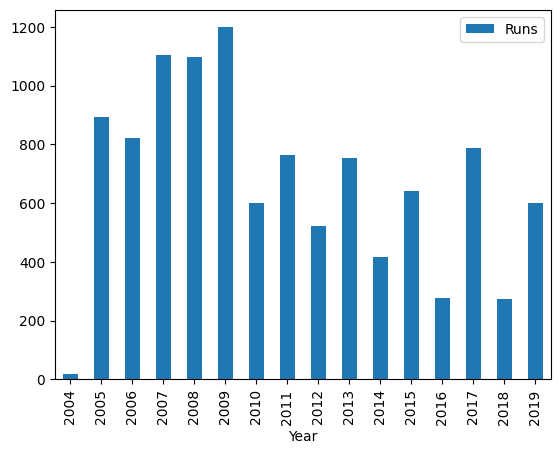

In [7]:
import matplotlib.pyplot as plt

# runs_by_year.plot(x='Year')
runs_by_year.plot(x='Year',kind='bar')
plt.show()

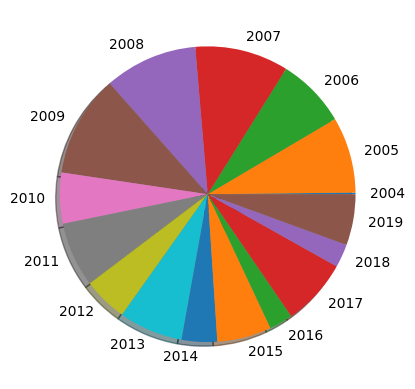

In [8]:
plt.pie(runs_by_year['Runs'],labels=runs_by_year['Year'], shadow=True)
plt.show()